# Instructions

1. Save a copy of this notebook in your Kaggle repo (select `Copy & Edit` in the notebook's homepage).
2. Take your time to read the description of the scenarios, then follow the instructions.
3. Run all the code cells progressively (including hidden ones). Do not modify the code unless otherwise specified. Keep in mind that this is not a programming excercise.
4. Try to reason over each question and discuss your answers with your peers.

In [ ]:
# Set up
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# One-armed bandit

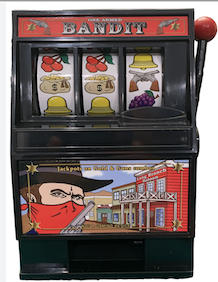


We stand in front of a one-armed bandit that rewards you with 1 euro if you win, with an unknown probability $p$. Alternatively it returns $0$ euros with probability $p-1$, resulting in the loss of the coin needed to play one round.
To determine whether it's worthwhile to play, we aim to estimate the probability $p$ based on a friend's past experiences with the slot machine. She played 10 times recording the following consecutive earnings and losses: $(+1, 0, 0, 0,0,0,0,+1,+1,0)$. This means that she has first won 1 euro then she lost, lost, lost ...
This is the observed data that we have to estimate $p$, i.e. our training set
$$(y^{(1)},y^{(2)},y^{(3)},y^{(4)},y^{(5)},y^{(6)},y^{(7)},y^{(8)}y^{(9)},y^{(10)})=(+1, 0, 0, 0,0,0,0,+1,+1,0)$$
We would like to estimate the probability distribution that generated this sequence of outcomes (loss $y=0$ and win $y=1$). This unknown distribution can be expressed as a probability vector over the possible outcome earnings $y\in\{0,1\}$ as $p_{data}=(1-p,p)$. To approximate the generating distribution $p_{data}$, we use one parameter $\lambda$ that represents what our belief on the probability of winning $1$ euro. $\lambda$ defines our candidate approximate distribution $p_{model}=(1-\lambda,\lambda)$. We want our belief to be close enough to the actual probability to win, i.e. $\lambda\approx p$.

With this respect, the best we can do is to select the value of $\lambda$ that makes the most likely to observe the outcomes in our training dataset. The function that measures how likely is to observe the training data given a parameter $\lambda$ is called likelihood. In this case the likelihood has the following expression
$$
\mathbb{L}(\lambda)= P(y^{(1)},y^{(2)},y^{(3)},y^{(4)},y^{(5)},y^{(6)},y^{(7)},y^{(8)}y^{(9)},y^{(10)}|\lambda) = P(+1,0,0,0,0,0,0,1,1,0|\lambda)=\lambda^3(1-\lambda)^7
$$



**Why is this the expression? Would it be different if the sequence was (0,0,0,0,0,0,0,+1,+1,+1)?**


In [ ]:
#One-harmed Bandit Likelihood
def likelihood(y):
    return lambda lambda_: lambda_**(np.sum(y))*(1-lambda_)**(np.sum(1-y))

#Plot likelihood
def plot_likelihood(likelihood, n = None):

    # Generate lambda values
    lambda_values = np.linspace(0, 1, 100)

    # Calculate y values based on the function
    l_values = likelihood(lambda_values)

    max_index = np.argmax(l_values)
    hat_lambda = lambda_values[max_index]
    hat_l = l_values[max_index]

    if n:
      log_values = np.log(l_values)
      minus_log_values = -log_values
      loss_values =minus_log_values/n

      plt.figure(figsize=(15, 5))

      plt.subplot(1, 4, 1)
      plt.title('Likelihood')

      # Mark the minimum point on the plot
      plt.scatter(hat_lambda, 0, color='red')
      plt.plot(lambda_values, l_values)
      plt.xlabel(r'$\lambda$')
      plt.xticks(np.arange(0,1.1,step=0.1))
      plt.grid()

      plt.subplot(1, 4, 2)
      plt.title('Log-Likelihood')
      # Mark the minimum point on the plot
      plt.scatter(hat_lambda, 0, color='red')
      plt.plot(lambda_values, log_values)
      plt.xlabel(r'$\lambda$')
      plt.xticks(np.arange(0,1.1,step=0.1))
      plt.grid()

      plt.subplot(1, 4, 3)
      plt.title('Negative Log-Likelihood')

      # Mark the minimum point on the plot
      plt.scatter(hat_lambda, 0, color='red')
      plt.plot(lambda_values, minus_log_values)
      plt.xlabel(r'$\lambda$')
      plt.xticks(np.arange(0,1.1,step=0.1))
      plt.grid()

      plt.subplot(1, 4, 4)
      plt.title('Cross Entropy Loss')
      # Mark the minimum point on the plot
      plt.scatter(hat_lambda, 0, color='red')
      plt.plot(lambda_values, loss_values)
      plt.xlabel(r'$\lambda$')
      plt.xticks(np.arange(0,1.1,step=0.1))
      plt.grid()

    else:
      # Mark the minimum point on the plot
      plt.scatter(hat_lambda, hat_l, color='red')

      # Plot the function
      plt.plot(lambda_values, l_values)

      # Add labels and title
      plt.xlabel(r'$\lambda$')
      plt.ylabel(r'$\mathbb{L}$')
      plt.xticks(np.arange(0,1.1,step=0.1))
      plt.grid()
      plt.title('Likelihood')

    return hat_lambda


In [ ]:
np.random.seed(42)

#Set a generating probability distribution p_data by setting probability of winnning p
p = np.random.rand()

def p_data(p):
   return np.array([1-p,p])

#Set a candidate model distribution p_model to approximate p_data
def p_model(lambda_):
  return np.array([1-lambda_,lambda_])

We initially believe that the probability to win is $0.8$.
**Can you compute the probability of observing the experience of our friend $(+1, 0, 0, 0,0,0,0,+1,+1,0)$ with our belief?**

 Our friend is convinced that the probability to win is $0.4$. **Do you think that the evidences are more in our or their favor?**

In [ ]:
#Sequence of osberved data to be used for training
y = np.array([1,0,0,0,0,0,0,1,1,0])

#Belief lambda
lambda_b = 0.8

#Compute the likelihood as a function of lambda based on the observations
l = likelihood(y)

#Compute the likelihood of observing y given our belief over lambda
l_b = l(lambda_b)
print(f'Likelihood of observing y given your belief is {l_b}')

#Belief friend
lambda_b =0.4

#Compute the likelihood of observing y given our belief over lambda
l_b = l(lambda_b)
print(f'Likelihood of observing y given your friend belief is {l_b}')

In this toy case, we have a formula for the likelihood that allows us to directly look for the belief over the unknown distribution that fit the best our observations $y$.

In other words, we look for the parameter $\hat\lambda$ that maximizes the likelihood. In math: $\hat\lambda = \text{argmax}_{\lambda} \mathbb{L}(\lambda)$.
Let's have a look at this function.

In [ ]:
#Plot likelihood
hat_lambda = plot_likelihood(l)
plt.show()

#Print parameter that is maximizing the likelihood (argmax)
print(f'Lambda that maximizes the likelihood {hat_lambda}')
print(f'Maximum likelihood value {l(hat_lambda)}')

**What does this curve represent?**

Then, it seems that $\hat \lambda \approx 0.3$ maximizes the probability to observe our data.
**Do you have an intuitive explanation for why?**


However, our experience has been also generated with some randomness so maybe we are not entirely sure that $0.3$ is actually a good estimate for $p$... So let's try now to play this game a bit more than 10 times and see how this affects the likelihood.

In [ ]:
#TODO: CHANGE HERE THE VALUE OF n TO CHOOSE HOW MANY TIMES YOU WANT TO PLAY
n = None

y = np.random.choice([0,1], size=n, p=[1-p,p])

#Print the likelihood
l = likelihood(y)

hat_lambda = plot_likelihood(l)
plt.show()

#Print parameter that is maximizing the likelihood (argmax)
print(f'Parameter that maximize the likelihood lambda {hat_lambda}')
print(f'Maximum of the likelihood lambda {l(hat_lambda)}')

**Does the result change if another person comes in and decides to play exactly the same number of times?**

**What do you notice when you play for 500 times?**


After you have reflected on these questions enough, check the actual parameter we are trying to approximate.

In [ ]:
print(f'Actual parameter p {p}')

OK so if we play enough times, we can estimate quite well the parameter $p$ and this estimate improves if we play more games and collect more data. Then, I have time so let's try to go back and play for $n=2000$ games. **Something went wrong... What happens?**

So let's go back and set $n=1000$. To prevent numerical instabilities, we apply the log. **Why does the log come to help?**

In [ ]:
#Plot Likelihood Log-likelihood Negative, Log-likelihood and Loss
hat_lambda = plot_likelihood(l,n)
plt.show()

1. Original Likelihood
2. Applying log to avoid too small (unstable) likelihood
3. Convert maximum to minimum (-)
4. Rescale according to the training set size n

**How do we rescale the negative log likelihood to obtain the loss? Why do we do that?**

**Is the minimum of the loss equal to the maximum of the likelihood?**

[Optional]
The cross entropy between two probability distributions measures of how much information an approximate distribution $p_\text{model}$ gives on the original distirbution that we want to approximate $p_\text{data}$ (the higher is the cross entrpy and the less informative is the approximate distribution over the ground truth). It is defined as
$$
CE(p_\text{data},p_\text{model}) = - p \log(\lambda) -(1-p)\log(1-\lambda)
$$
Now we have our optimal model $p_\text{model}=(1-\hat\lambda,\hat\lambda)$. How do we estimate how actually informative is this model compared to the actual unknown $p_\text{data}$? We sample a test set, or we play again a number of times $n_\text{test}$, to collect $(y^{(1)}_\text{test},\dots,y^{(n_\text{test})}_\text{test})$. Now we compute the cross entropy loss over this test set as
$$
L^{test}_\text{CE}= \frac{1}{n_\text{test}}\sum_{i=1}^{n_\text{test}} - y^{(i)}_\text{test}\log(\hat\lambda)- (1-y^{(i)}_\text{test})\log(1-\hat\lambda)
$$
The empirical cross entropy computed over a test set estimates the cross entropy between the ground truth distribution and our approximation. That means that if $n_\text{test}$ is large enough  $L^{test}_\text{CE}\approx CE(p_\text{data},p_\text{model})$

Thus, the test error gives an indication of how much information the approximate distribution $p_\text{model}$ gives on the ground truth distribution $p_\text{data}$ (the smaller the test error and the more informative is the approximation).

Let us have a look at the CE and its empirical estimator.


In [ ]:
def CE(p,q):
  return np.sum(-p*np.log(q))

def Empirical_CE(y_test):
    return np.mean(-y_test*np.log(hat_lambda)- (1-y_test)*np.log(1-hat_lambda))

In [ ]:
#Size of test set
n = 1000

#Sample a test set playing 100 additional times
y_test = np.random.choice([0,1], size=n, p=[1-p,p])

#Cross entropy between p_model and p_data
print('Cross entropy between the distributions p_model and p_data', CE(p_data(p),p_model(hat_lambda)))

#Cross entropy loss for the optimal parameter lambda_
print('Empirical cross entropy over the test set or test error', Empirical_CE(y_test))

Try to change the size of the test set. **What is the effect?**

Well, we know that our approximation should be pretty good ($\hat\lambda$ is very close to $p$). So what does this error exactly mean? Is it bad or good?

To answer this question, consider a different scenario: the bandit is broken and gives 1 euro with high probability $p=0.98$.
Imagine that we repeat all the steps above: use a training sample, define the likelihood and find the maximum.

In [ ]:
#Probability for a broken bandit
p=0.98

#training size
n = 100

#sample a training set
y_train = np.random.choice([0,1], size=n, p=[1-p,p])

#Compute likelihood function
l = likelihood(y_train)

#Optimize to find maximum likelihood
hat_lambda = plot_likelihood(l)

print('Optimal parameter lambda', hat_lambda)
print('Original parameter p', p)

Even in this case we have obtained a pretty good estimation. However, there's quite a bit difference in the test errors...

In [ ]:
#Size of test set
n = 1000

#Sample a test set playing 100 additional times
y_test = np.random.choice([0,1], size=n, p=[1-p,p])

#Cross entropy between p_model and p_data
print('Cross entropy between the distributions p_model and p_data', CE(p_data(p),p_model(hat_lambda)))

#Cross entropy loss for the optimal parameter lambda_
print('Empirical cross entropy over the test set or test error', Empirical_CE(y_test))

This is much smaller than before! So the quality of the approximation seems almost equivalent but the test errors not. **Why? what is different?**


# Multi-armed bandits
Let's now consider a slightly different scenario: there are two bandits, labelled as $0$ and $1$ with distinct unknown probabilitis of winning 1 euro. We indicate the bandit with the variable $x\in\{0,1\}$. Specifically $p_0=P(y=1|x=0)$ represents the probability of gaining $1$ euro when playing bandit $0$ and $p_1=P(y=1|x=1)$ when playing with bandit $1$. We are still interested in approximating the distribution
$$
p_{data}(y|x)=
\begin{cases}
[1-p_0,p_0]& if \,x=0\\
[1-p_1,p_1]& if \,x=1
\end{cases}
$$
with a parameter $\lambda=P(y=1|x)$.

In [ ]:
p = np.array([0.001,0.5])

#Generating probability distribution p_data
def p_data(p,x):
   return np.array([1-p[x],p[x]])

#small mistake here
#Model distribution p_model to approximate p_data
def p_model(lambda_,x):
   return np.array([1-lambda_[x],lambda_[x]])

**What is the difference with the single bandit?**

We play $5000$ rounds by randomly choosing one of the two bandits. We store in the training set the sequence of bandits $x^{(1)}, x^{(2)}, ..., x^{(n)}$ and the money collected each round $y^{(1)}, y^{(2)}, ..., y^{(n)}$.

In [ ]:
#Play a number n of this game
n = 5000

#Bandits
x = np.random.randint(2,size=n)

#Euros
y = np.array([int(np.random.choice([0,1],size = 1, p = p_data(p,x[i]))) for i in range(n)])

Let's print the some of the games that we have played. 

In [ ]:
print('Bandit:', x[:20])
print('Reward:', y[:20])

Now, we have the training set of bandits and rewards $\{x^{(i)},y^{(i)}\}$ and the goal to approximate the distribution $p_\text{data}$.
**Which kind of problem is it?**

We would like to use a one layer feedforward network to solve this problem. **How would you set it up: what is the input/output? How many input, hidden, output units? What activation function to use? What is the size of the network (number of parameters including weights and bias terms)?**


Assume that we have set our network $f(x;\theta)=\lambda$, precisely $\lambda= \sigma(x\cdot w+b)$ then if we follow the maximum likelihood criterion the loss is given by
$$
L_\text{CE}(\theta) =\frac{1}{n}\sum_{i=1}^n - y^{(i)}\log(\lambda^{(i)})-(1-y^{(i)})\log(1-\lambda^{(i)})
$$
In this scenario, we have only two scalar parameters $(w,b)$ and a relatively simple expression of the loss. So we can plot it and found the minimum.

In [ ]:
#Forward pass of a linear layer with a sigmoid activation
def lambda_net(w,b):
   return lambda x: 1/(1 + np.exp(-(x*w + b)))

#Compute loss as a function of the only two parameters w,b
def loss(w,b):

  hat_lambda = lambda_net(w,b)(x)
  loss_ = np.mean(-y*np.log(hat_lambda)-(1-y)*(np.log(1-hat_lambda)))

  return loss_

<font color=red> There was a small mistake in the cell below </font>

In [ ]:
# Define a range of values for w and b
w_values = np.linspace(-10, 10, 100)
b_values = np.linspace(-10, 10, 100)

# Create a meshgrid for 3D plotting
W, B = np.meshgrid(w_values, b_values)

# Calculate the loss for each combination of w and b
loss_values = np.zeros_like(W)
for i in range(len(w_values)):
    for j in range(len(b_values)):
        loss_values[i, j] = loss(w_values[i],b_values[j])

# Find the indices of the minimum value in the matrix
min_indices = np.unravel_index(np.argmin(loss_values), loss_values.shape)

# Find the minimum value
min_value = loss_values[min_indices]

#Those line were not correct
min_w = w_values[min_indices[0]] 
min_b = b_values[min_indices[1]]

hat_theta = min_w,min_b
hat_net = lambda_net(min_w,min_b)


fig = plt.figure(figsize=(15, 6))

# 3D Surface Plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(W, B, loss_values, cmap='viridis')
ax1.set_xlabel('w')
ax1.set_ylabel('b')
ax1.set_zlabel('loss')

# Filled Contour Plot
ax2 = fig.add_subplot(122)
contourf = ax2.contourf(W, B, loss_values, levels=20, cmap='viridis')
ax2.set_xlabel('w')
ax2.set_ylabel('b')
ax2.plot(W[min_indices],B[min_indices],marker='o',color='red',markersize=8)

# Add colorbar to the filled contour plot
cb2 = fig.colorbar(contourf, ax=ax2)
cb2.set_label('loss values')

plt.show()


# Print the results
print("Minimum loss:", min_value)
print("Optimal (w, b) values:", hat_theta)



Now we found the optimal parameters $\hat\theta=(\hat w,\hat b)$ for the network that defines our best candidate model. Let's verify that such model is assigning the right probabilities to win 1 euro to the two bandits ($x=0$, $x=1$). **How do we compute them?**

<font color=red> The cell below was not complete </font>

In [ ]:
print('Approximate probability of winning 1 euros for bandit 0',hat_net(0))
print('Approximate probability of winning 1 euros for bandit 1',hat_net(1))

print('\nActual probability of winning 1 euros for bandit 0:',p_data(p,0)[1])
print('Actual probability of winning 1 euros for bandit 1:',p_data(p,1)[1])

They shoud look pretty accurate.

[Optional] The minimum loss sould be around 0.3. This corresponds to the mean of the entropies of the first and second bandit. Precisely, the first bandit is almost deterministic and therefore the entropy will be quite close to $0$. Contrarily, the second bandit is purely stochastic, so the entropy should be close to $log(2)=0.69$ (why?).

# Other armed bandits
To make the bandits more appealing, the casino owner decides to program them to occasionally return $100$ euros with a very small probability while otherwise returning either $0$ or $1$ euro.
**What is the problem we are trying to solve now?**
**How do we set a neural network to solve this problem: what is input, output, last layer activation...?**



(Optional) Finally, assume that the bandits can return any real amount of money. The reward $y$ follows a Gaussian distribution $N(\mu_{x},\sigma^2=1)$, with a mean $\mu_x$ that depends on the bandit $x$ and variance equal to $1$. We can not hope to estimate exactly the outcome of one bandit (because of randomness) and neither can we determine the probabilities of a single outcome (as they are infinitely many). However, we can estimate the population mean $\mu$. Even in this case the mean can vary with the bandit so it is a function of $x$. **What is the problem we are trying to solve now?**
**How do we set a neural network to solve this problem: what is input, output, last layer activation?**

**Can you define the loss as the average negative log-likelihood? How does it look like?**